In [48]:
import numpy as np
import os
import glob
from DET import DET

scores_path = 'similarity_scores/'

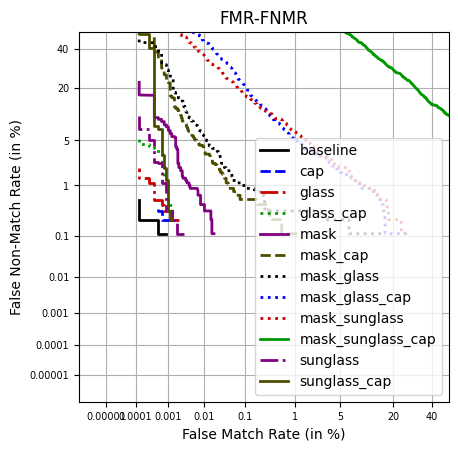

In [76]:
occlusion_list = []
for file in [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]:
    if 'real' and not 'synthetic' in file:
        occlusion_list.append('-')
    else:
        occlusion_list.append(
            ('_'.join(os.path.splitext(file)[0].split('_')[5:])))
occlusion_list = [*set(occlusion_list)]
occlusion_list.sort()

det = DET(biometric_evaluation_type='algorithm', plot_title='FMR-FNMR')
det.create_figure()
for occlusion in occlusion_list:
    if occlusion == '-':
        system = 'baseline'
        for file in [os.path.basename(file) for file in glob.glob(scores_path + 'real' + '*mated.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    else:
        system = occlusion
        for file in [os.path.basename(file) for file in glob.glob(scores_path + '*mated_' + occlusion + '.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    det.plot(tar=mated, non=non_mated, label=system)
det.legend_on()
det.save('example_algorithm', 'pdf')

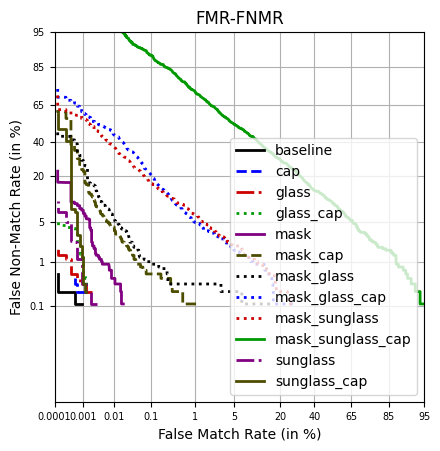

In [96]:
occlusion_list = []
for file in [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]:
    if 'real' and not 'synthetic' in file:
        occlusion_list.append('-')
    else:
        occlusion_list.append(
            ('_'.join(os.path.splitext(file)[0].split('_')[5:])))
occlusion_list = [*set(occlusion_list)]
occlusion_list.sort()

det = DET(biometric_evaluation_type='algorithm', plot_title='FMR-FNMR')
det.x_limits = numpy.array([1e-6, .95])
det.y_limits = numpy.array([1e-6, .95])
det.x_ticks = numpy.array([1e-6, 1e-5 ,1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2,  85e-2, 95e-2])
det.x_ticklabels = numpy.array(['0.0001','0.001', '0.01','0.1', '1', '5', '20', '40', '65', '85', '95'])
det.y_ticks = numpy.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
det.y_ticklabels = numpy.array(['0.1', '1', '5', '20', '40', '65', '85', '95'])
det.create_figure()
for occlusion in occlusion_list:
    if occlusion == '-':
        system = 'baseline'
        for file in [os.path.basename(file) for file in glob.glob(scores_path + 'real' + '*mated.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    else:
        system = occlusion
        for file in [os.path.basename(file) for file in glob.glob(scores_path + '*mated_' + occlusion + '.npy')]:
            if 'non-mated' in os.path.basename(file):
                non_mated = np.load(os.path.join(scores_path,file))
            else:
                mated = np.load(os.path.join(scores_path,file))
    det.plot(tar=mated, non=non_mated, label=system)
det.legend_on()
det.save('DET_all', 'pdf')